# Linear Regression Notation

A linear model is simply a model which weights each input and then adds all the weighted inputs together for a prediction.

It is the classic $y=mx+b$ from school.

In order to properly notate a linear model, we can think of it as a number of weighted scalars
$$ \hat{y}= \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_n x_n $$
Where 
* $\theta_0$ is the bias term
* $\theta$ is the weight or model parameter
* $n$ is the number of features
* $x$ is the feature value

*note* $\theta_0$ actually does have an $x_0$ with it, but $x_0 = 1$ and thus it is dropped


We can actually take these scalars and combine them into vectors

so $x_1, x_2, ... x_n$ can be represented as **x**
$$ \mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots  \\ x_n \end{bmatrix}  $$

We can do the same things with the weights, assign them to a vector $\boldsymbol{\theta}$

Our new notation for a linear model then becomes:

$$ \hat{y}=h_\boldsymbol{\theta} (\mathbf{x}) = \boldsymbol{\theta} \cdot \mathbf{x} $$

*note* if the vectors are *column vectors* as is common with machine learning vectors, then the combination is $\boldsymbol{\theta}^\intercal \mathbf{x}$. This way we make the parameters a row vector and we can do a matrix multiplication. 

# Linear Model Training

A linear model is the equation for a line that minimizes prediction error. We can measure this with the mean squared error.

So our cost function that needs to be minimized is:
$$(\frac{1}{m})\sum_{i=1}^{m}(\boldsymbol{\theta}^\intercal \mathbf{x}^{i} - y^{i})^{2} $$ or $$ MSE(\boldsymbol{\theta})$$

We can directly calculate the $\theta$s that give us the lowest MSE using:
$$ \hat{\boldsymbol{\theta}} = (\mathbf{X}^{\intercal} \mathbf{X})^{-1} \mathbf{X}^{\intercal} \mathbf{y} $$

In [1]:
import numpy as np

In [5]:
np.random.seed(10)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)


In [6]:
# numpy gives us inv() to get the inverse of a matrix. Used as np.linalg.inv()
# numpy gives us dot() for dot products

# first we need to add the bias term
bias_array = np.ones((100,1)) #one for each instance/record
bias_array[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [7]:
X_b = np.c_[bias_array,X]
X_b[:5]

array([[1.        , 1.54264129],
       [1.        , 0.0415039 ],
       [1.        , 1.26729647],
       [1.        , 1.49760777],
       [1.        , 0.99701402]])

In [8]:
best_theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
best_theta

array([[4.24963579],
       [2.81740108]])

We know that the correct answer should be 
* bias term of 4
* $\theta$ of 3

(since we set $y$ to that earlier).  So this got very close.

In [9]:
# Now we use those to make a prediction

X_test = np.array([[0],[2]])
X_test_b = np.c_[np.ones((2,1)), X_test]
y_predict = X_test_b.dot(best_theta)
y_predict

array([[4.24963579],
       [9.88443794]])

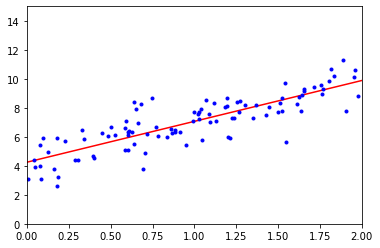

In [10]:
# Let's visualize this model
import matplotlib.pyplot as plt

plt.plot(X_test, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

## Using Scikit-Learn for Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
lin_reg.intercept_, lin_reg.coef_

(array([4.24963579]), array([[2.81740108]]))

In [14]:
lin_reg.predict(X_test)

array([[4.24963579],
       [9.88443794]])